### Approach - 

-- As we can see that the dataset contains detals of the students with the target variable as the grade based on the performance pf the student.

-- The grades are given in points from 0 to 20. So first we will make the grades into categories A/B/C/D/E.

-- We will encode the categorical variables into numeric.

-- In EDA, we will try to visualize different columns.

-- we will do feature selection, using co-relation, so that we can drop the columns which are affecting the target variable too much or too less

-- we will train our data with different models

-- and finally based on the accuracy, precision, reall and f1 score we will decide which model performs better to predict the grade of the student


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("student_dataset.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [4]:
for col in df.columns:
      print(col,' - ',df[col].unique())

school  -  ['GP' 'MS']
sex  -  ['F' 'M']
age  -  [18 17 15 16 19 22 20 21]
address  -  ['U' 'R']
famsize  -  ['GT3' 'LE3']
Pstatus  -  ['A' 'T']
Medu  -  [4 1 3 2 0]
Fedu  -  [4 1 2 3 0]
Mjob  -  ['at_home' 'health' 'other' 'services' 'teacher']
Fjob  -  ['teacher' 'other' 'services' 'health' 'at_home']
reason  -  ['course' 'other' 'home' 'reputation']
guardian  -  ['mother' 'father' 'other']
traveltime  -  [2 1 3 4]
studytime  -  [2 3 1 4]
failures  -  [0 3 1 2]
schoolsup  -  ['yes' 'no']
famsup  -  ['no' 'yes']
paid  -  ['no' 'yes']
activities  -  ['no' 'yes']
nursery  -  ['yes' 'no']
higher  -  ['yes' 'no']
internet  -  ['no' 'yes']
romantic  -  ['no' 'yes']
famrel  -  [4 5 3 1 2]
freetime  -  [3 2 4 1 5]
goout  -  [4 3 2 1 5]
Dalc  -  [1 2 5 3 4]
Walc  -  [1 3 2 4 5]
health  -  [3 5 1 2 4]
absences  -  [ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]
G1  -  [ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]
G2  -  [11 13 14 12 16 17  8 10 15  9  7  6 18 1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [7]:
for col in df.columns:
    print('-' * 10 + col + '-' * 10)
    display(df[col].value_counts().head(10))

----------school----------


GP    423
MS    226
Name: school, dtype: int64

----------sex----------


F    383
M    266
Name: sex, dtype: int64

----------age----------


17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64

----------address----------


U    452
R    197
Name: address, dtype: int64

----------famsize----------


GT3    457
LE3    192
Name: famsize, dtype: int64

----------Pstatus----------


T    569
A     80
Name: Pstatus, dtype: int64

----------Medu----------


2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64

----------Fedu----------


2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64

----------Mjob----------


other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64

----------Fjob----------


other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64

----------reason----------


course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64

----------guardian----------


mother    455
father    153
other      41
Name: guardian, dtype: int64

----------traveltime----------


1    366
2    213
3     54
4     16
Name: traveltime, dtype: int64

----------studytime----------


2    305
1    212
3     97
4     35
Name: studytime, dtype: int64

----------failures----------


0    549
1     70
2     16
3     14
Name: failures, dtype: int64

----------schoolsup----------


no     581
yes     68
Name: schoolsup, dtype: int64

----------famsup----------


yes    398
no     251
Name: famsup, dtype: int64

----------paid----------


no     610
yes     39
Name: paid, dtype: int64

----------activities----------


no     334
yes    315
Name: activities, dtype: int64

----------nursery----------


yes    521
no     128
Name: nursery, dtype: int64

----------higher----------


yes    580
no      69
Name: higher, dtype: int64

----------internet----------


yes    498
no     151
Name: internet, dtype: int64

----------romantic----------


no     410
yes    239
Name: romantic, dtype: int64

----------famrel----------


4    317
5    180
3    101
2     29
1     22
Name: famrel, dtype: int64

----------freetime----------


3    251
4    178
2    107
5     68
1     45
Name: freetime, dtype: int64

----------goout----------


3    205
2    145
4    141
5    110
1     48
Name: goout, dtype: int64

----------Dalc----------


1    451
2    121
3     43
5     17
4     17
Name: Dalc, dtype: int64

----------Walc----------


1    247
2    150
3    120
4     87
5     45
Name: Walc, dtype: int64

----------health----------


5    249
3    124
4    108
1     90
2     78
Name: health, dtype: int64

----------absences----------


0     244
2     110
4      93
6      49
8      42
10     21
1      12
5      12
12     12
16     10
Name: absences, dtype: int64

----------G1----------


10    95
11    91
12    82
13    72
14    71
9     65
8     42
15    35
7     33
16    22
Name: G1, dtype: int64

----------G2----------


11    103
12     86
10     83
13     80
9      72
14     54
8      40
15     38
16     25
17     20
Name: G2, dtype: int64

----------G3----------


11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
Name: G3, dtype: int64

##### Labelling G1,G2,G3 columns into 5 classes based on the grades given

In [8]:
bins = [0,4,8,12,16,20]
# labels=[1,2,3,4,5]

df['G1'] = pd.cut(df['G1'], bins=bins, labels=False, include_lowest=True)
df['G2'] = pd.cut(df['G2'], bins=bins, labels=False, include_lowest=True)
df['G3'] = pd.cut(df['G3'], bins=bins, labels=False, include_lowest=True)

print (df['G3'])

0      2
1      2
2      2
3      3
4      3
      ..
644    2
645    3
646    2
647    2
648    2
Name: G3, Length: 649, dtype: int64


In [9]:
df.G1.dtype

dtype('int64')

In [10]:
df['G3'].value_counts()

2    308
3    230
1     49
4     46
0     16
Name: G3, dtype: int64

#### One hot encoding the categorical columns

In [11]:
df.select_dtypes(include=['object']).columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [12]:
nominal_cols = ['school', 'sex', 'address', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']

In [13]:
df_1 = pd.get_dummies(df,columns=nominal_cols)
df_1.head()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,GT3,4,4,2,2,0,4,3,4,...,1,0,0,1,0,1,1,0,1,0
1,17,GT3,1,1,1,2,0,5,3,3,...,1,0,1,0,0,1,0,1,1,0
2,15,LE3,1,1,1,2,0,4,3,2,...,1,0,0,1,0,1,0,1,1,0
3,15,GT3,4,2,1,3,0,3,2,2,...,0,1,0,1,0,1,0,1,0,1
4,16,GT3,3,3,1,2,0,4,3,2,...,1,0,0,1,0,1,1,0,1,0


Label_encoding

In [14]:
from sklearn import preprocessing
le_FS = preprocessing.LabelEncoder()
le_FS = le_FS.fit(df_1['famsize'])
df_1['famsize'] = le_FS.transform(df_1['famsize'])
(df_1['famsize']).head()

0    0
1    0
2    1
3    0
4    0
Name: famsize, dtype: int32

In [15]:
df_1.dtypes

age                  int64
famsize              int32
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
G3                   int64
school_GP            uint8
school_MS            uint8
sex_F                uint8
sex_M                uint8
address_R            uint8
address_U            uint8
Pstatus_A            uint8
Pstatus_T            uint8
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
Fjob_services        uint8
Fjob_teacher         uint8
reason_course        uint8
reason_home          uint8
r

In [16]:
df_1.corr()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
age,1.000000,-0.002470,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,...,0.054279,-0.054279,0.021441,-0.021441,0.265497,-0.265497,-0.013115,0.013115,-0.178810,0.178810
famsize,-0.002470,1.000000,-0.014325,-0.039538,0.012794,-0.010945,-0.066068,0.004641,-0.021257,-0.004312,...,0.014790,-0.014790,-0.100686,0.100686,-0.004523,0.004523,-0.013357,0.013357,0.032936,-0.032936
Medu,-0.107832,-0.014325,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,...,-0.119354,0.119354,-0.125951,0.125951,-0.213896,0.213896,-0.266052,0.266052,0.030992,-0.030992
Fedu,-0.121050,-0.039538,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,...,-0.079700,0.079700,-0.074863,0.074863,-0.191735,0.191735,-0.183483,0.183483,0.067675,-0.067675
traveltime,0.034490,0.012794,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,...,0.033376,-0.033376,0.011509,-0.011509,0.071958,-0.071958,0.190826,-0.190826,-0.004751,0.004751
studytime,-0.008415,-0.010945,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,...,-0.070080,0.070080,-0.042630,0.042630,-0.188256,0.188256,-0.037529,0.037529,-0.033036,0.033036
failures,0.319968,-0.066068,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,...,-0.000561,0.000561,0.069241,-0.069241,0.309400,-0.309400,0.095330,-0.095330,-0.069901,0.069901
famrel,-0.020559,0.004641,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,...,-0.057597,0.057597,-0.041055,0.041055,-0.048239,0.048239,-0.082214,0.082214,0.044920,-0.044920
freetime,-0.004910,-0.021257,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,...,-0.150329,0.150329,0.007096,-0.007096,0.102618,-0.102618,-0.063268,0.063268,-0.027112,0.027112
goout,0.112805,-0.004312,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,...,-0.088582,0.088582,-0.018679,0.018679,0.069105,-0.069105,-0.092869,0.092869,0.000520,-0.000520


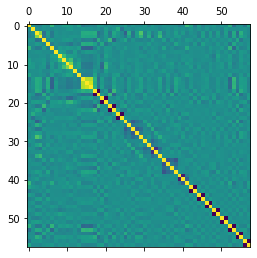

<Figure size 720x432 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
plt.matshow(df_1.corr())
plt.figure(figsize=(10,6))
plt.show()

In [18]:
# import seaborn as sns

# corr_matrix = df_1.corr()

# plt.figure(figsize=(20,20))
# sns.heatmap(corr_matrix, annot=True, cmap="Blues")
# plt.title('Correlation Heatmap', fontsize=20)

In [19]:
corr_matrix = df_1.corr()
corr_matrix["G3"].sort_values(ascending=False)

G3                   1.000000
G2                   0.858114
G1                   0.770512
higher_yes           0.314290
school_GP            0.259682
studytime            0.241605
Medu                 0.228395
Fedu                 0.186291
reason_reputation    0.162540
address_U            0.159810
internet_yes         0.138007
Mjob_teacher         0.133036
Fjob_teacher         0.128161
sex_F                0.125070
Mjob_health          0.094481
romantic_no          0.088517
famrel               0.080001
paid_no              0.066980
schoolsup_no         0.062815
reason_home          0.061000
activities_yes       0.045163
famsup_yes           0.035477
Fjob_health          0.035112
nursery_yes          0.026089
guardian_mother      0.024761
guardian_father      0.022924
Mjob_services        0.020739
famsize              0.019336
Pstatus_A            0.001671
Pstatus_T           -0.001671
Fjob_other          -0.004853
nursery_no          -0.026089
Fjob_at_home        -0.035061
famsup_no 

###### droppping G1,G2 columns as they are highly coreelated to target variable

In [20]:
df_1.drop(['G1', 'G2'], axis = 1, inplace = True )

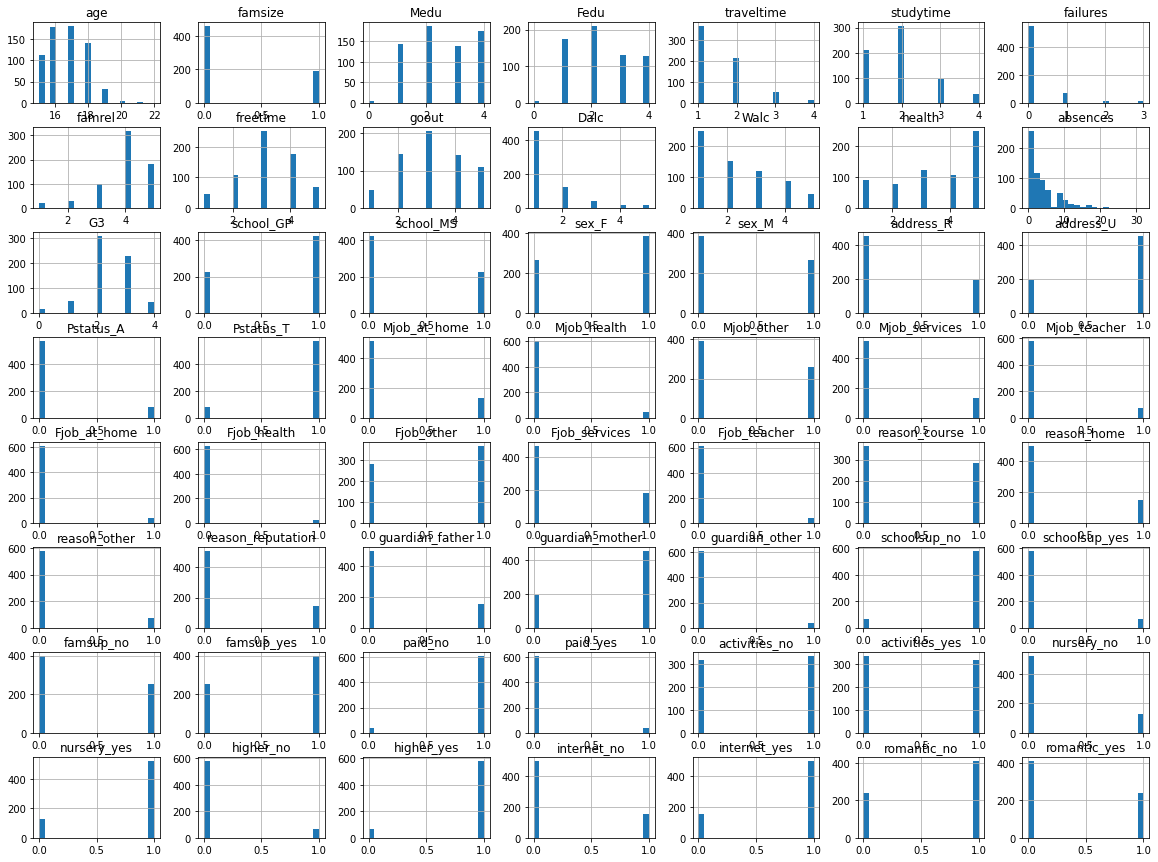

In [21]:
df_1.hist(bins=20, figsize=(20,15))
plt.show()

In [22]:
# Separate Input features X and Class variable Y

X = df_1.loc[:, ~df_1.columns.isin(['G3'])]
Y = df_1.loc[:,'G3']

In [23]:
# Split Training and Testing Data

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state=7)

# Modelling

## SVC

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:

from sklearn.svm import SVC
classifier_1 = SVC(kernel = 'rbf', random_state = 0)
classifier_1.fit(X_train, Y_train)
# Predicting the Test set results
Y_pred_SVC= classifier_1.predict(X_test)
cm_SVC=confusion_matrix(Y_test,Y_pred_SVC)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_SVC=classification_report(Y_test,Y_pred_SVC)
print(report_SVC)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        13
           2       0.56      0.80      0.66        74
           3       0.56      0.53      0.55        60
           4       0.00      0.00      0.00        12

    accuracy                           0.56       163
   macro avg       0.22      0.27      0.24       163
weighted avg       0.46      0.56      0.50       163



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Randon Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier_2=RandomForestClassifier(n_estimators=80,criterion="entropy",random_state=0)
classifier_2.fit(X_train,Y_train)

#predicting the test set re4sults
Y_pred_random=classifier_2.predict(X_test)
cm_RFC=confusion_matrix(Y_test,Y_pred_random)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_RFC=classification_report(Y_test,Y_pred_random)
print(report_SVC)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        13
           2       0.56      0.80      0.66        74
           3       0.56      0.53      0.55        60
           4       0.00      0.00      0.00        12

    accuracy                           0.56       163
   macro avg       0.22      0.27      0.24       163
weighted avg       0.46      0.56      0.50       163



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier_3=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier_3.fit(X_train,Y_train)
# Predicting the Test set results
Y_pred_knn= classifier_3.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn= confusion_matrix(Y_test, Y_pred_knn)

#determining the precision,recall and f1-score 
from sklearn.metrics import classification_report
report_knn=classification_report(Y_test,Y_pred_knn)
print(report_knn)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.25      0.08      0.12        13
           2       0.56      0.69      0.62        74
           3       0.48      0.52      0.50        60
           4       0.00      0.00      0.00        12

    accuracy                           0.51       163
   macro avg       0.26      0.26      0.25       163
weighted avg       0.45      0.51      0.47       163



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
print('*'*30,'SVC','*'*30)
print(report_SVC)

print('*'*25,'Random Forest','*'*25)
print(report_RFC)

print('*'*30,'KNN','*'*30)
print(report_knn)

****************************** SVC ******************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        13
           2       0.56      0.80      0.66        74
           3       0.56      0.53      0.55        60
           4       0.00      0.00      0.00        12

    accuracy                           0.56       163
   macro avg       0.22      0.27      0.24       163
weighted avg       0.46      0.56      0.50       163

************************* Random Forest *************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.08      0.14        13
           2       0.52      0.68      0.59        74
           3       0.46      0.50      0.48        60
           4       0.00      0.00      0.00        12

    accuracy                           0.50       163